# 0 - Imports

In [82]:
# Manejo de datos
import pandas as pd
import numpy as np
import os

# Visualización de datos
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Red Neuronal
from tensorflow.keras import models
from tensorflow.keras import layers

# MLFlow
import mlflow

# Utilidades
import sys
sys.path.append("..\..")
from package_utilities import mlflow_utils as mlf
from joblib import dump # Gurdado local modelo

# 1- Cargar de datos

In [83]:
X_train = pd.read_parquet("../../data/train_set_test/TfidfVectorizer/X_train.parquet")
X_val = pd.read_parquet("../../data/train_set_test/TfidfVectorizer/X_val.parquet")
Y_train = pd.read_parquet("../../data/train_set_test/TfidfVectorizer/Y_train.parquet")
Y_val = pd.read_parquet("../../data/train_set_test/TfidfVectorizer/Y_val.parquet")

In [84]:
# Creación conjunto Test
X_test = X_val[-50:]
X_val = X_val[:-50]

Y_test = Y_val[-50:]
Y_val = Y_val[:-50]

# 2- Construcción del modelo

In [85]:
name = "4_Keras"

In [86]:
# Estructura
model = models.Sequential()

model.add(layers.Dense(120, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))

In [87]:
# Parámetros
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision']
)

In [88]:
# Entrenamiento
history = model.fit(
    X_train,
    Y_train,
    epochs=60,
    batch_size=512,
    validation_data=(X_val, Y_val))

Epoch 1/60
13/13 [==============================] - 5s 216ms/step - loss: 0.6869 - accuracy: 0.5557 - precision: 0.3893 - val_loss: 0.6768 - val_accuracy: 0.5723 - val_precision: 0.0000e+00
Epoch 2/60
13/13 [==============================] - 1s 94ms/step - loss: 0.6564 - accuracy: 0.5713 - precision: 1.0000 - val_loss: 0.6377 - val_accuracy: 0.5797 - val_precision: 1.0000
Epoch 3/60
13/13 [==============================] - 1s 90ms/step - loss: 0.5675 - accuracy: 0.6795 - precision: 0.9707 - val_loss: 0.5602 - val_accuracy: 0.7482 - val_precision: 0.9174
Epoch 4/60
13/13 [==============================] - 1s 90ms/step - loss: 0.4079 - accuracy: 0.8731 - precision: 0.9450 - val_loss: 0.5099 - val_accuracy: 0.7830 - val_precision: 0.7819
Epoch 5/60
13/13 [==============================] - 1s 104ms/step - loss: 0.2450 - accuracy: 0.9305 - precision: 0.9331 - val_loss: 0.5582 - val_accuracy: 0.7775 - val_precision: 0.7511
Epoch 6/60
13/13 [==============================] - 1s 93ms/step - lo

## Visualización entrenamiento 

In [89]:
print("Los valores finales son")
pd.DataFrame(history.history)[-1:]

Los valores finales son


,loss,accuracy,precision,val_loss,val_accuracy,val_precision
59,0.021178,0.989183,0.988464,1.434209,0.75641,0.719912


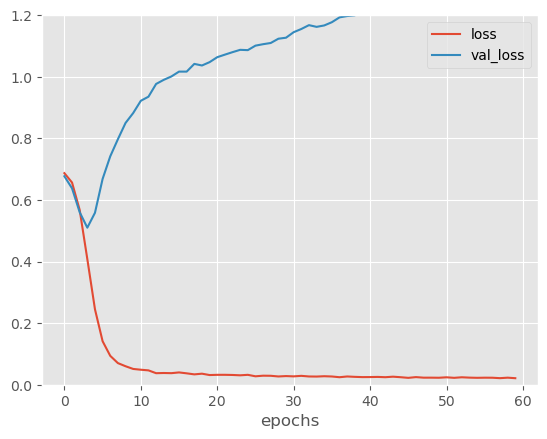

In [90]:
from package_utilities import grafics_utils

df = pd.DataFrame(history.history)[['loss', 'val_loss']]
loss_grafic = grafics_utils.evolution_keras_train(df)

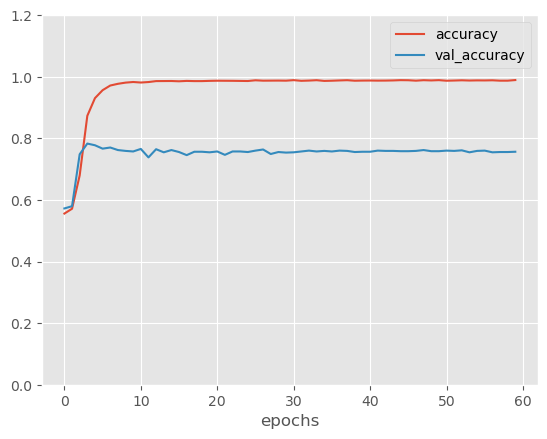

In [91]:
df = pd.DataFrame(history.history)[['accuracy', 'val_accuracy']]
accuracy_grafic = grafics_utils.evolution_keras_train(df)

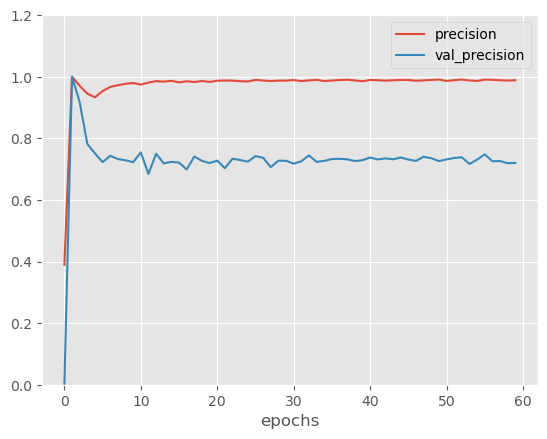

In [92]:
df = pd.DataFrame(history.history)[['precision', 'val_precision']]
precision_grafic = grafics_utils.evolution_keras_train(df)

## Test

2/2 [==============================] - 0s 11ms/step
Precisión: 0.8571428571428571
Recall: 0.75
Accuracy: 0.82
F1 score: 0.7999999999999999
AUC: 0.8173076923076922


(0.8571428571428571,
 0.75,
 0.82,
 0.7999999999999999,
 0.8173076923076922,
 <Figure size 640x480 with 2 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>)

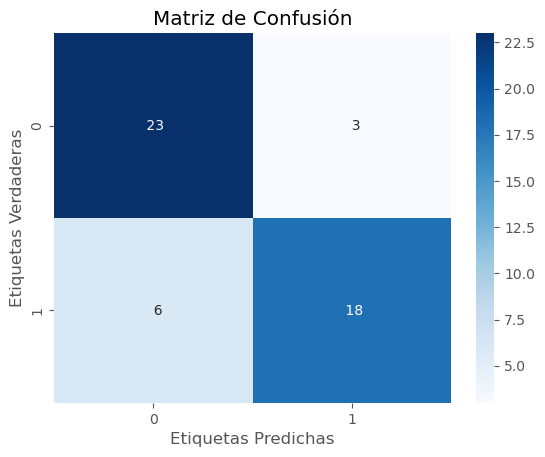

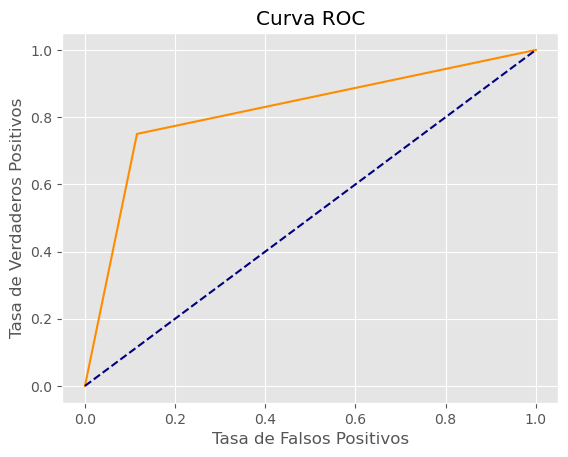

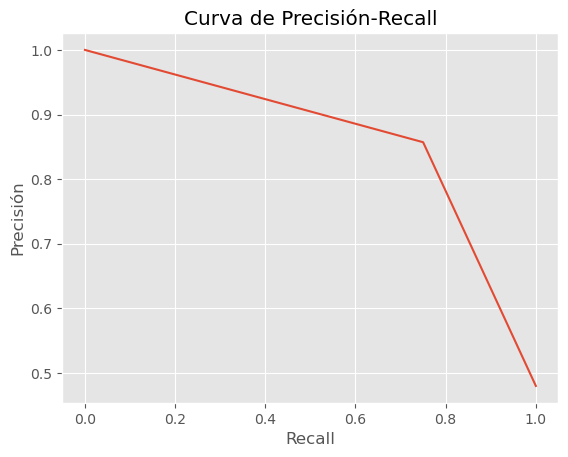

In [93]:
from package_utilities import evaluate_model
Y_pred = model.predict(X_test).round(0)
evaluate_model(Y_pred, Y_test)

# 3- Evaluación del modelo

In [94]:
X_test = pd.read_csv("../../data/originals/test.csv")
X_test_vectorized = pd.read_parquet("../../data/modifications/TfidfVectorizer/X_test.parquet")

Y_pred = model.predict(X_test_vectorized).round(0)
Y_pred

102/102 [==============================] - 1s 7ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [95]:
for i in range(30):
    print("{} - {}".format(X_test['text'][i], Y_pred[i]))

Just happened a terrible car crash - [1.]
Heard about #earthquake is different cities, stay safe everyone. - [1.]
there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all - [1.]
Apocalypse lighting. #Spokane #wildfires - [1.]
Typhoon Soudelor kills 28 in China and Taiwan - [1.]
We're shaking...It's an earthquake - [1.]
They'd probably still show more life than Arsenal did yesterday, eh? EH? - [0.]
Hey! How are you? - [0.]
What a nice hat? - [0.]
Fuck off! - [0.]
No I don't like cold! - [0.]
NOOOOOOOOO! Don't do that! - [0.]
No don't tell me that! - [1.]
What if?! - [0.]
Awesome! - [0.]
Birmingham Wholesale Market is ablaze BBC News - Fire breaks out at Birmingham's Wholesale Market http://t.co/irWqCEZWEU - [1.]
@sunkxssedharry will you wear shorts for race ablaze ? - [0.]
#PreviouslyOnDoyinTv: Toke MakinwaÛªs marriage crisis sets Nigerian Twitter ablaze... http://t.co/CMghxBa2XI - [1.]
Check these out: http://t.co/rOI2NSmEJJ http://t.co/3Tj8ZjiN

# 4 - Registro del modelo

### MLFlow

In [96]:
from package_utilities import mlflow_utils as mlf

def cargar_MLFlow():
    with mlflow.start_run(run_name=name):
        # Modelo
        mlf.log_model(model, name)

        # Parámetros
        mlflow.log_param("optimizer", model.optimizer.__class__.__name__)
        mlflow.log_param("loss", model.loss)
        mlflow.log_param("num_layers", len(model.layers))
        for i, layer in enumerate(model.layers):
            mlflow.log_param(f"layer_{i}_type", layer.__class__.__name__)
            mlflow.log_param(f"layer_{i}_units", layer.units if hasattr(layer, 'units') else "N/A")
            mlflow.log_param(f"layer_{i}_activation", layer.get_config().get('activation', 'N/A'))
            # Si la capa es de tipo Dropout, registrar el rate
            if layer.__class__.__name__ == 'Dropout':
                mlflow.log_param(f"layer_{i}_rate", layer.get_config().get('rate', 'N/A'))


        # Registrar métricas
        for metric_name, metric_values in history.history.items():
            for epoch, metric_value in enumerate(metric_values):
                mlflow.log_metric(metric_name, metric_value, step=epoch)

        # Gráficas
        mlf.log_plot(loss_grafic, "Loss_evolution_grafica.png")
        mlf.log_plot(accuracy_grafic, "Accuracy_evolution_grafica.png")
        mlf.log_plot(precision_grafic, "Precision_evolution_grafica.png")
        

        # Añadir tag al registro
        mlflow.set_tag("Tecnología", "Deep Learning")

In [97]:
# MLFlow
mlflow.set_tracking_uri("../../mlflow/")
mlflow.set_experiment("NPL-Tweets")
cargar_MLFlow()

INFO:tensorflow:Assets written to: ram://8551c5bd-6955-438d-9ab3-1104306fe085/assets


2023/10/30 18:45:07 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: C:\Users\enric\AppData\Local\Temp\tmp7m8yf7dg\model\model.pkl, flavor: sklearn), fall back to return ['scikit-learn==1.3.2', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback.


### Gurdado local

In [98]:
dump(model, '../../models/'+name+'.joblib')

INFO:tensorflow:Assets written to: ram://82d42a8a-aba3-448a-b666-5f02eaaf8bf9/assets


['../../models/4_Keras.joblib']